In [4]:
import numpy as np
import pandas as pd
import xgboost as xgb
import catboost as catb
import lightgbm as lgb 
import matplotlib.pyplot as plt
import seaborn as sns

    

In [3]:

df = pd.read_csv('houses.csv')
df.head()

,numrooms,sqauremeters,levels_on_building,level,price,distrcit,microdistrict,street,builtyear,ceilinghight,seller,bathroomtype,repaired
0,2,56.7,9.0,3.0,38000000,жетысуский,NaN,райымбека 245б — проспект райымбека,2006,2.70,Хозяин недвижимости,раздельный,NaN
1,3,100.0,16.0,13.0,59000000,бостандыкский,NaN,сатпаева 90/43а,2019,2.85,Специалист,NaN,черновая отделка
2,1,45.8,10.0,3.0,59600000,бостандыкский,NaN,радостовца 270,2022,3.00,Специалист,совмещенный,дргуой ремонт
3,2,67.0,5.0,4.0,28400000,алатауский,мкр зердели (алгабас-6) 1/36 — момышулы монке би,NaN,2012,2.80,Специалист,раздельный,после ремонта
4,3,93.0,9.0,2.0,55000000,алатауский,мкр нуркент (алгабас-1),NaN,2018,3.00,Хозяин недвижимости,2 с/у и более,дргуой ремонт


In [14]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15743 entries, 0 to 15742
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   numrooms            15743 non-null  int64  
 1   sqauremeters        15743 non-null  float64
 2   levels_on_building  14699 non-null  float64
 3   level               14839 non-null  float64
 4   price               15743 non-null  int64  
 5   distrcit            15300 non-null  object 
 6   microdistrict       6403 non-null   object 
 7   street              9326 non-null   object 
 8   builtyear           15743 non-null  int64  
 9   ceilinghight        11385 non-null  float64
 10  seller              15743 non-null  object 
 11  bathroomtype        12418 non-null  object 
 12  repaired            4239 non-null   object 
dtypes: float64(4), int64(3), object(6)
memory usage: 1.6+ MB


(15743, 13)

In [16]:
df = df.drop(columns=['microdistrict', 'street'])

In [17]:
df.head()

,numrooms,sqauremeters,levels_on_building,level,price,distrcit,builtyear,ceilinghight,seller,bathroomtype,repaired
0,2,56.7,9.0,3.0,38000000,жетысуский,2006,2.70,Хозяин недвижимости,раздельный,NaN
1,3,100.0,16.0,13.0,59000000,бостандыкский,2019,2.85,Специалист,NaN,черновая отделка
2,1,45.8,10.0,3.0,59600000,бостандыкский,2022,3.00,Специалист,совмещенный,дргуой ремонт
3,2,67.0,5.0,4.0,28400000,алатауский,2012,2.80,Специалист,раздельный,после ремонта
4,3,93.0,9.0,2.0,55000000,алатауский,2018,3.00,Хозяин недвижимости,2 с/у и более,дргуой ремонт


In [47]:
cat_cols = [
    'distrcit',
    'seller',
    'bathroomtype',
    'repaired'
]

num_cols = [
    'numrooms',
    'sqauremeters',
    'levels_on_building',
    'level',
    'price',
    'builtyear',
    'ceilinghight',
]

In [49]:
def barplot_col(col):
    bathroom_counts = df[col].value_counts()

    # Plot the bar plot
    plt.bar(bathroom_counts.index, bathroom_counts.values)

    # Customize the plot
    plt.title(f'{col.capitalize()}s')
    plt.xlabel(f'{col.capitalize()}')
    plt.ylabel('Count')
    plt.xticks(rotation=90)  # Rotate x-axis labels if necessary for better readability
    # Display the plot
    plt.show()


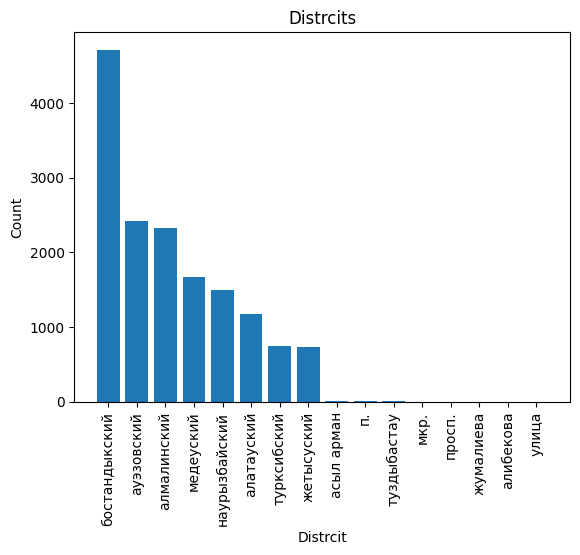

In [52]:
barplot_col('distrcit')

In [61]:
df['seller'].value_counts()

seller
Специалист                                                               7607
Хозяин недвижимости                                                      6014
Крыша Агент                                                               848
Компания                                                                  731
Новостройка ЖК «Koktobe city» от застройщика «Kusto Home»                  21
                                                                         ... 
Новостройка ЖК «Айнабулак 33/2» от застройщика «Центр СМР»                  2
Новостройка ЖК «Sunny Village» от застройщика «Бабаева Р.М»                 2
Новостройка ЖК «Gul-Ana» от застройщика «KazSMU»                            1
Новостройка ЖК «Remizovka Life» от застройщика «ТОО TVK Almaty»             1
Новостройка ЖК «Sunday Terrace на Айтматова» от застройщика «ТОО ЖВК»       1
Name: count, Length: 67, dtype: int64

In [46]:
df['distrcit'].value_counts()

distrcit
бостандыкский    4713
ауэзовский       2423
алмалинский      2326
медеуский        1664
наурызбайский    1495
алатауский       1173
турксибский       749
жетысуский        726
асыл арман         14
п.                  7
туздыбастау         4
мкр.                2
просп.              1
жумалиева           1
алибекова           1
улица               1
Name: count, dtype: int64